## Get Packages 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read The Data And Show Some Info

In [3]:
df= pd.read_csv('./TheData/train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106800 entries, 0 to 106799
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   eeg_id                            106800 non-null  int64  
 1   eeg_sub_id                        106800 non-null  int64  
 2   eeg_label_offset_seconds          106800 non-null  float64
 3   spectrogram_id                    106800 non-null  int64  
 4   spectrogram_sub_id                106800 non-null  int64  
 5   spectrogram_label_offset_seconds  106800 non-null  float64
 6   label_id                          106800 non-null  int64  
 7   patient_id                        106800 non-null  int64  
 8   expert_consensus                  106800 non-null  object 
 9   seizure_vote                      106800 non-null  int64  
 10  lpd_vote                          106800 non-null  int64  
 11  gpd_vote                          106800 non-null  i

In [5]:
df.sample(2)

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
2679,4152256712,2,6.0,40722820,2,6.0,2930491745,37399,GRDA,0,0,0,0,3,0
67390,3385406151,7,74.0,1350524075,7,74.0,3353667306,50154,Seizure,3,0,0,0,0,0


## Show Heat Map

In [6]:
df1=df.copy()

df1.drop(columns=['expert_consensus'], inplace=True)

In [7]:
correlation_matrix = df1.corr()

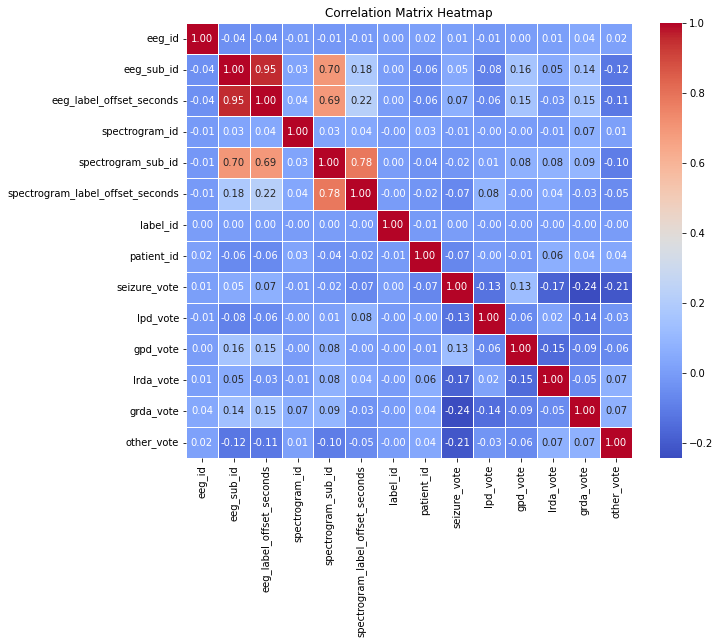

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Plot a histogram for the number of unique values in each column


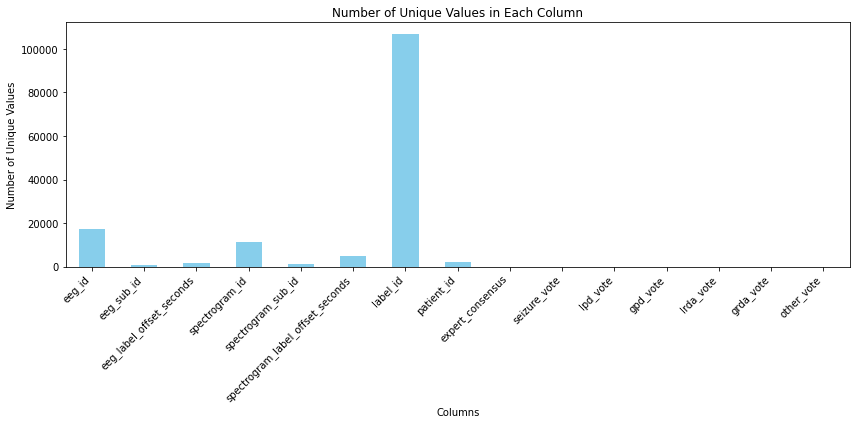

In [9]:
unique_counts = df.nunique()

plt.figure(figsize=(12, 6))
unique_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### here the colums that have ids like ['eeg_id', 'eeg_sub_id', 'spectrogram_id','spectrogram_sub_id', 'label_id', 'patient_id'] the uniques are very high compared to the total number of rows so histogram may not be the most informative visualization

In [10]:
# dataset without ids columns
id_columns = ['eeg_id', 'eeg_sub_id', 'spectrogram_id', 'spectrogram_sub_id', 'label_id', 'patient_id']
dataset_wo_ids = df.drop(id_columns,axis=1)

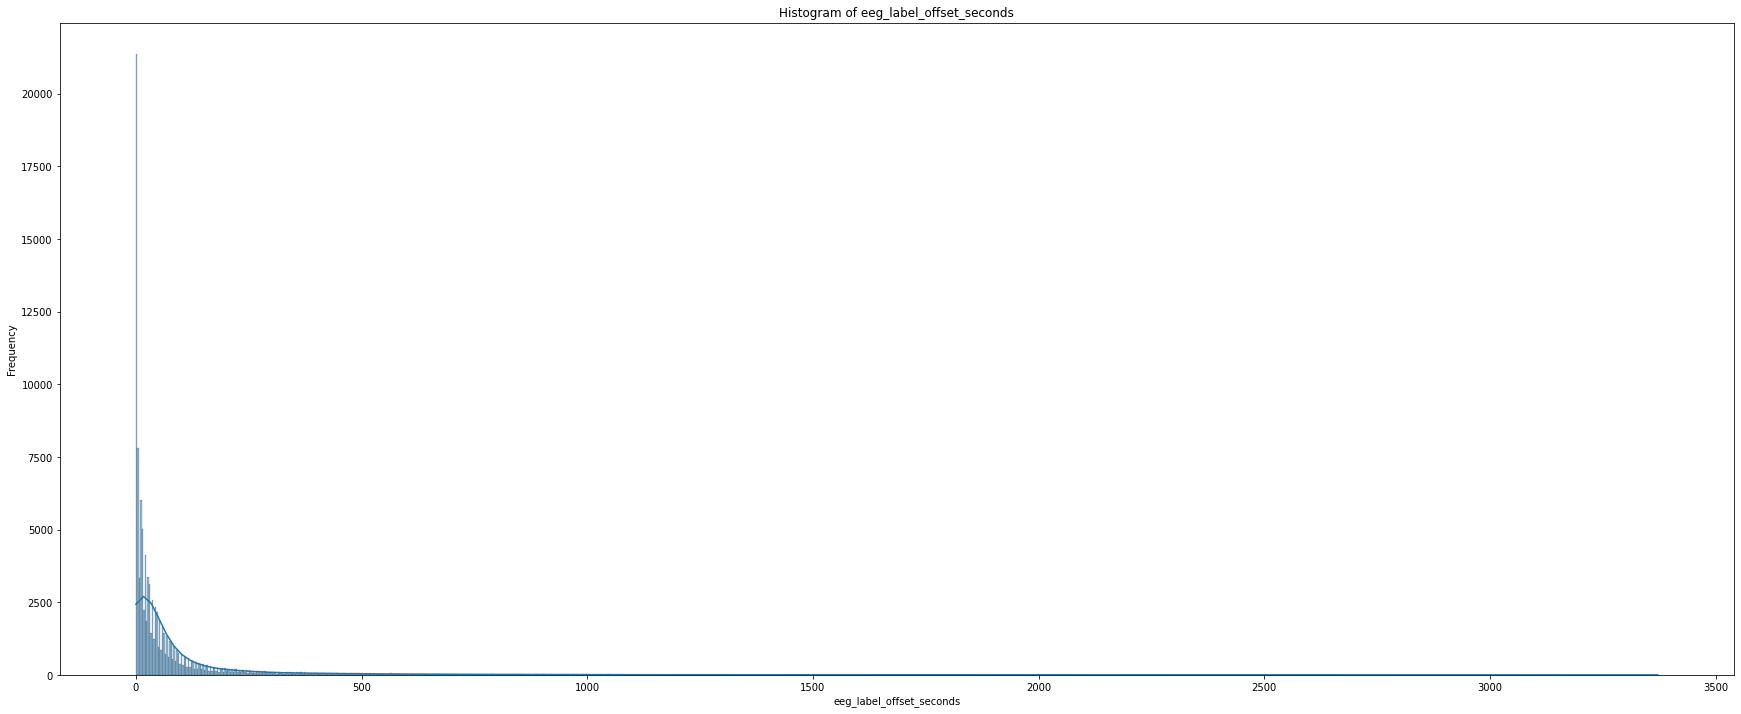

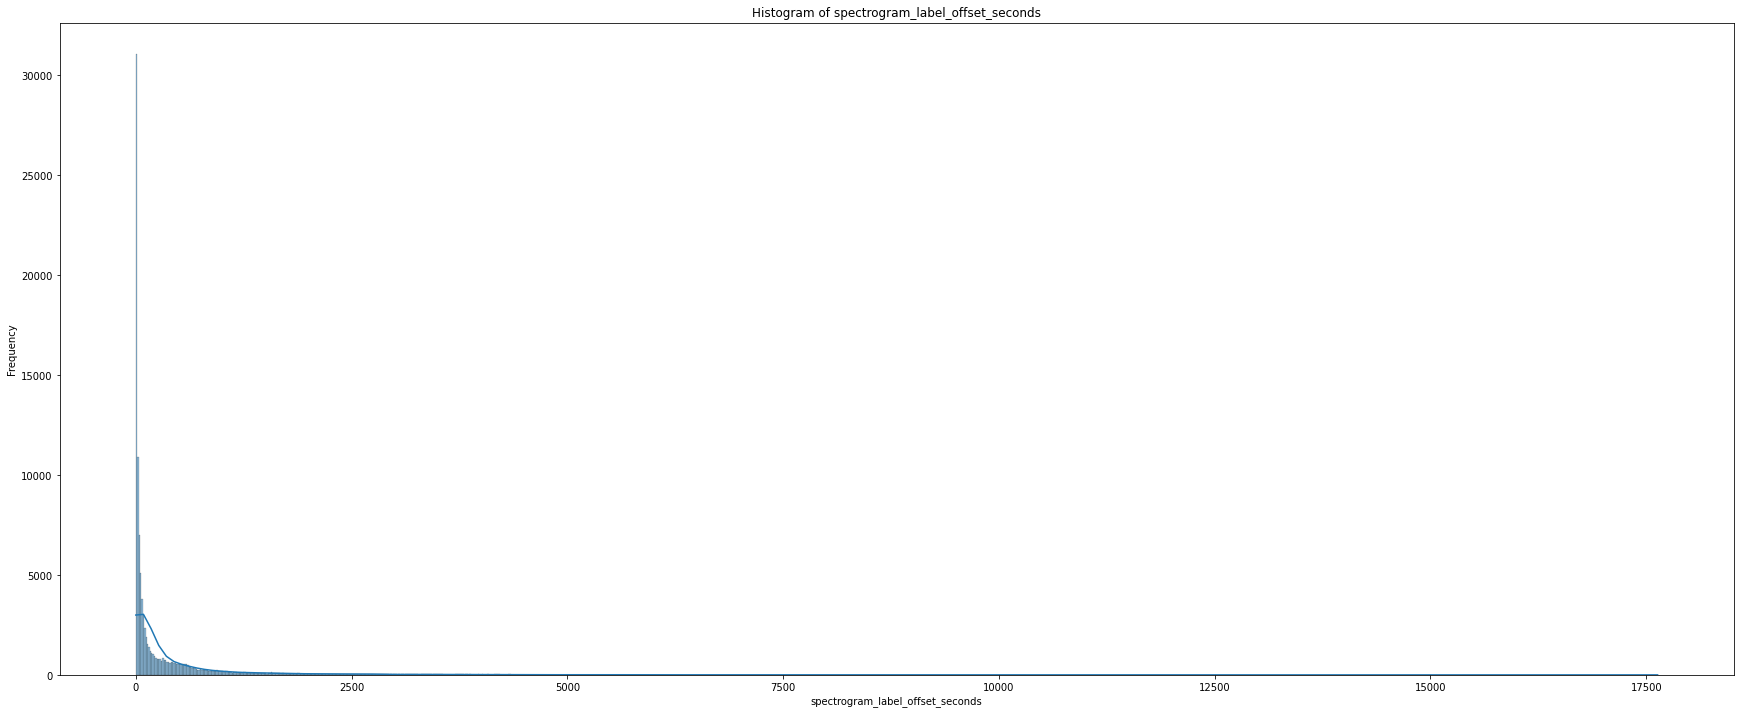

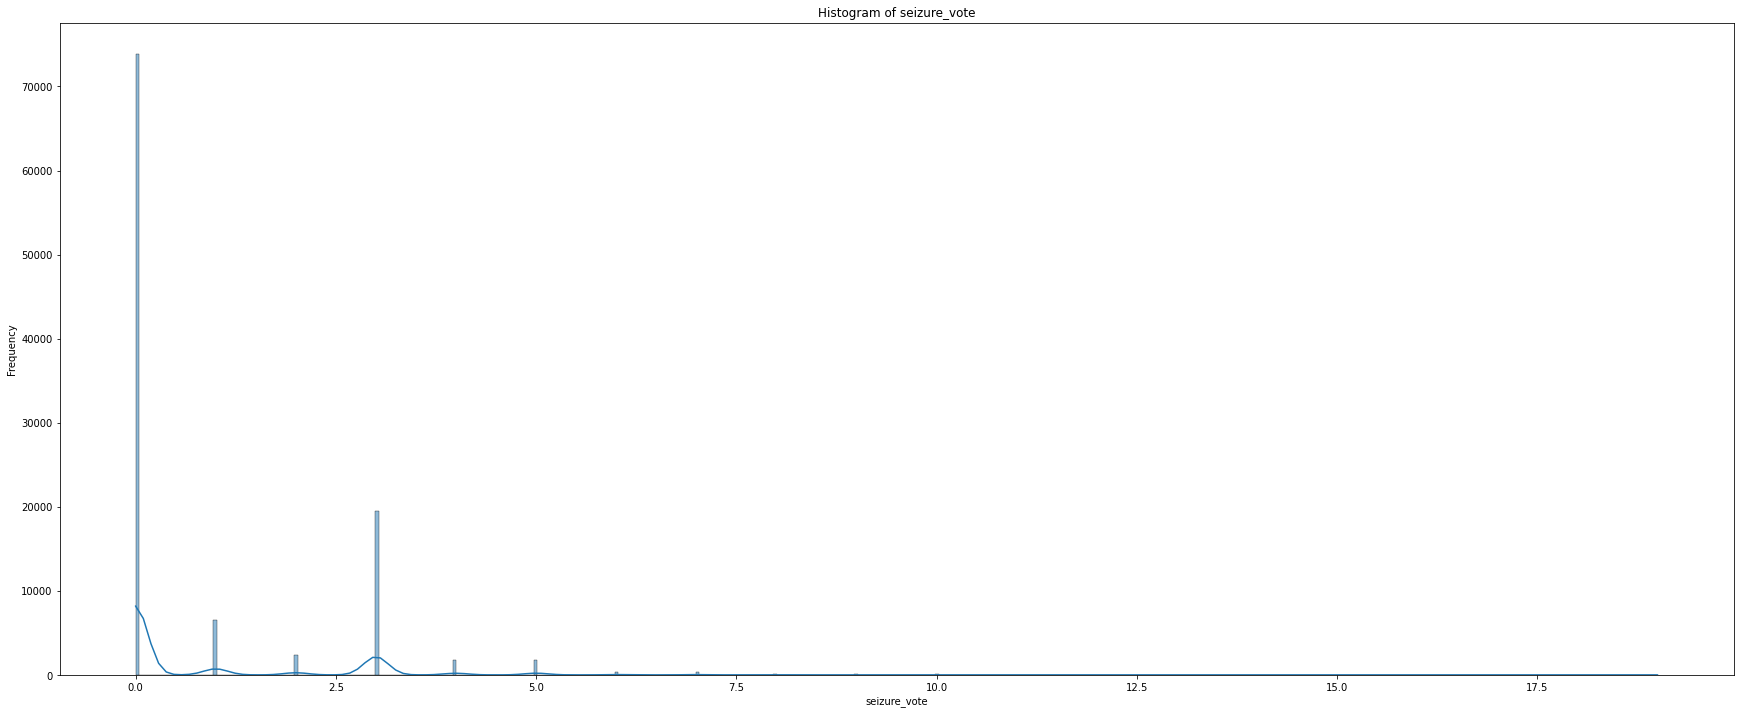

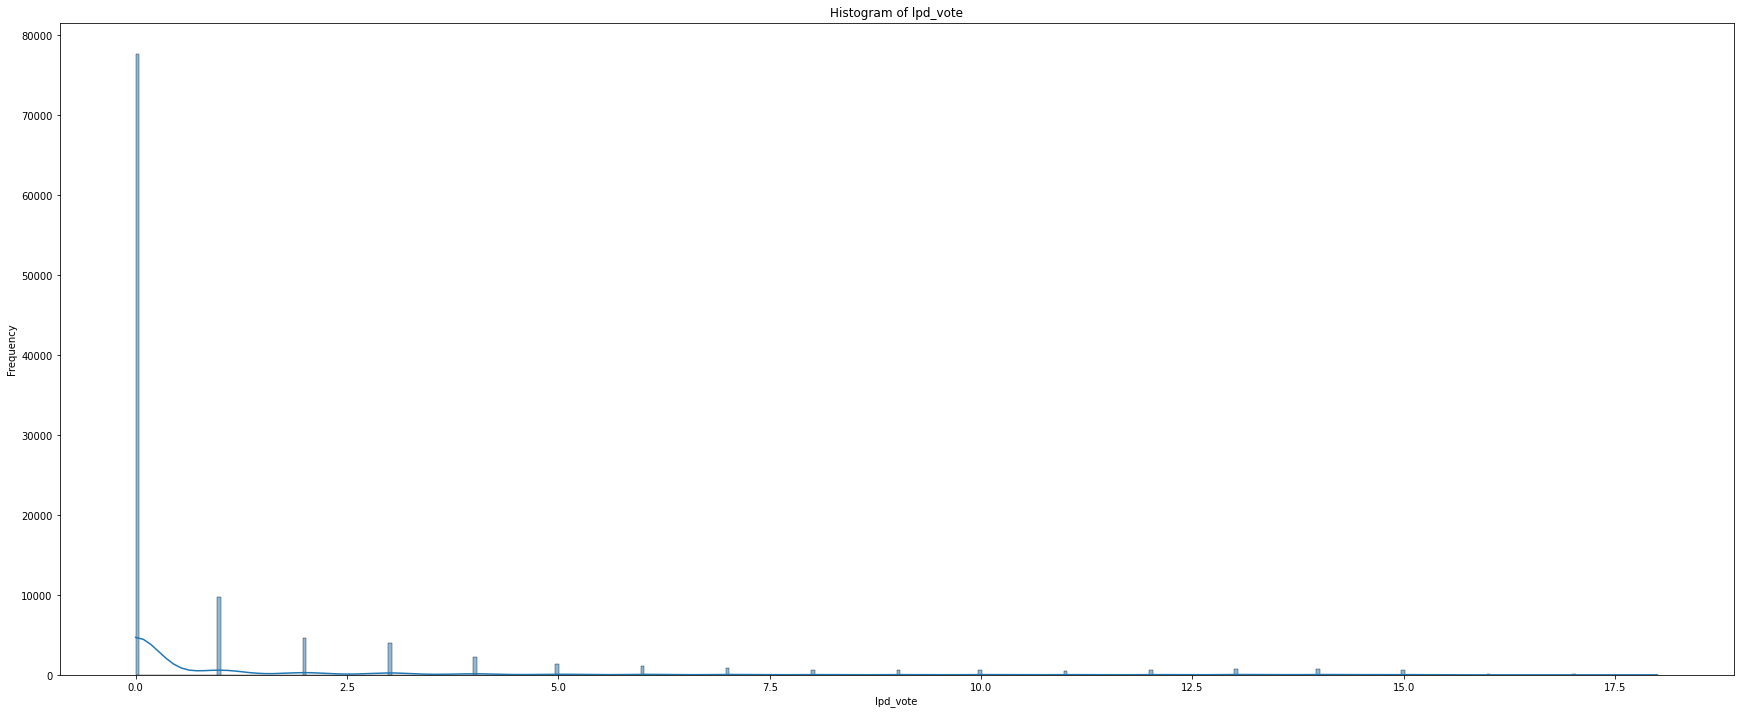

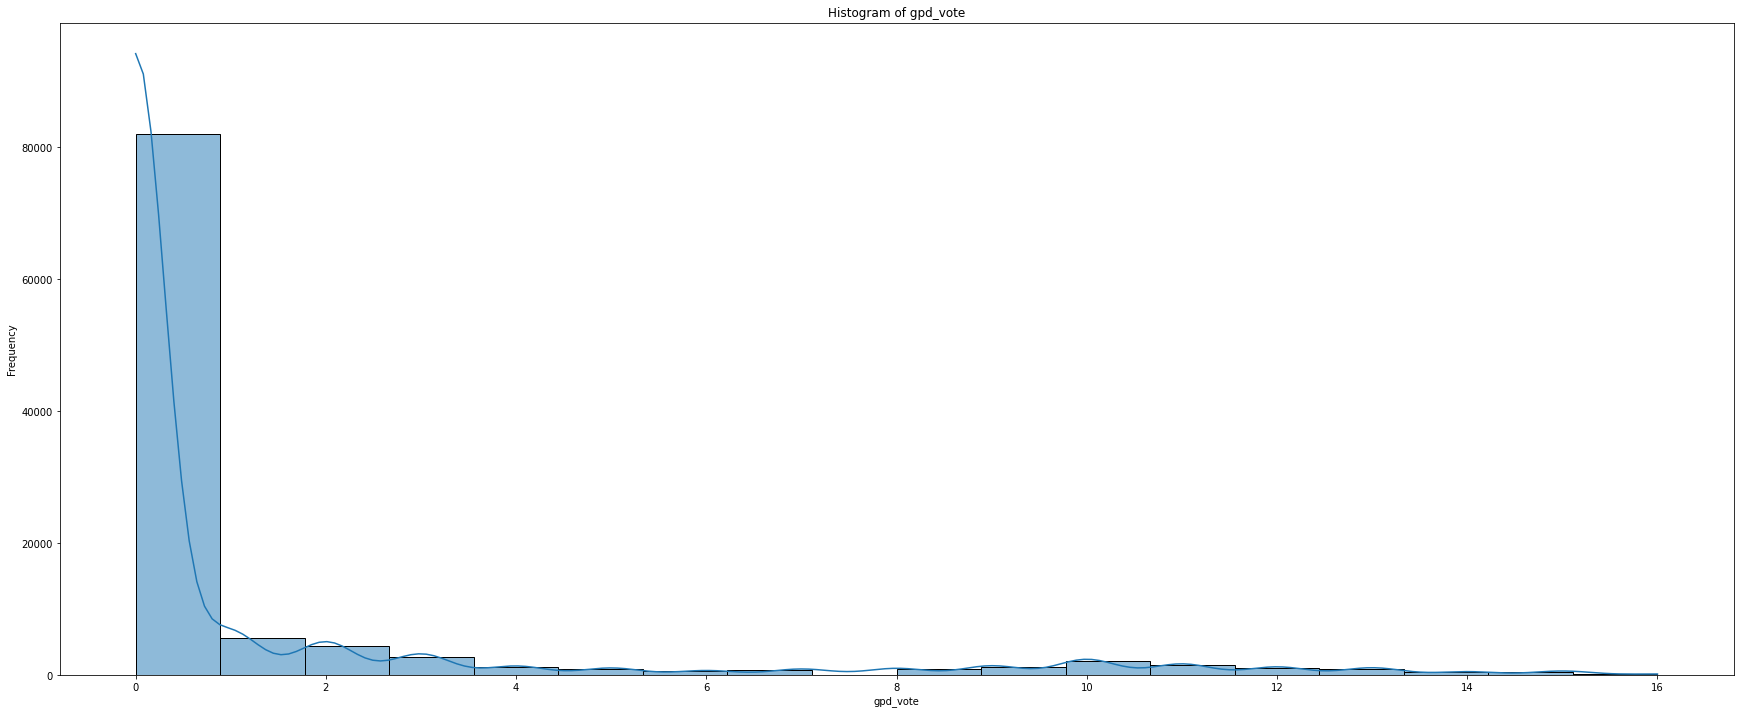

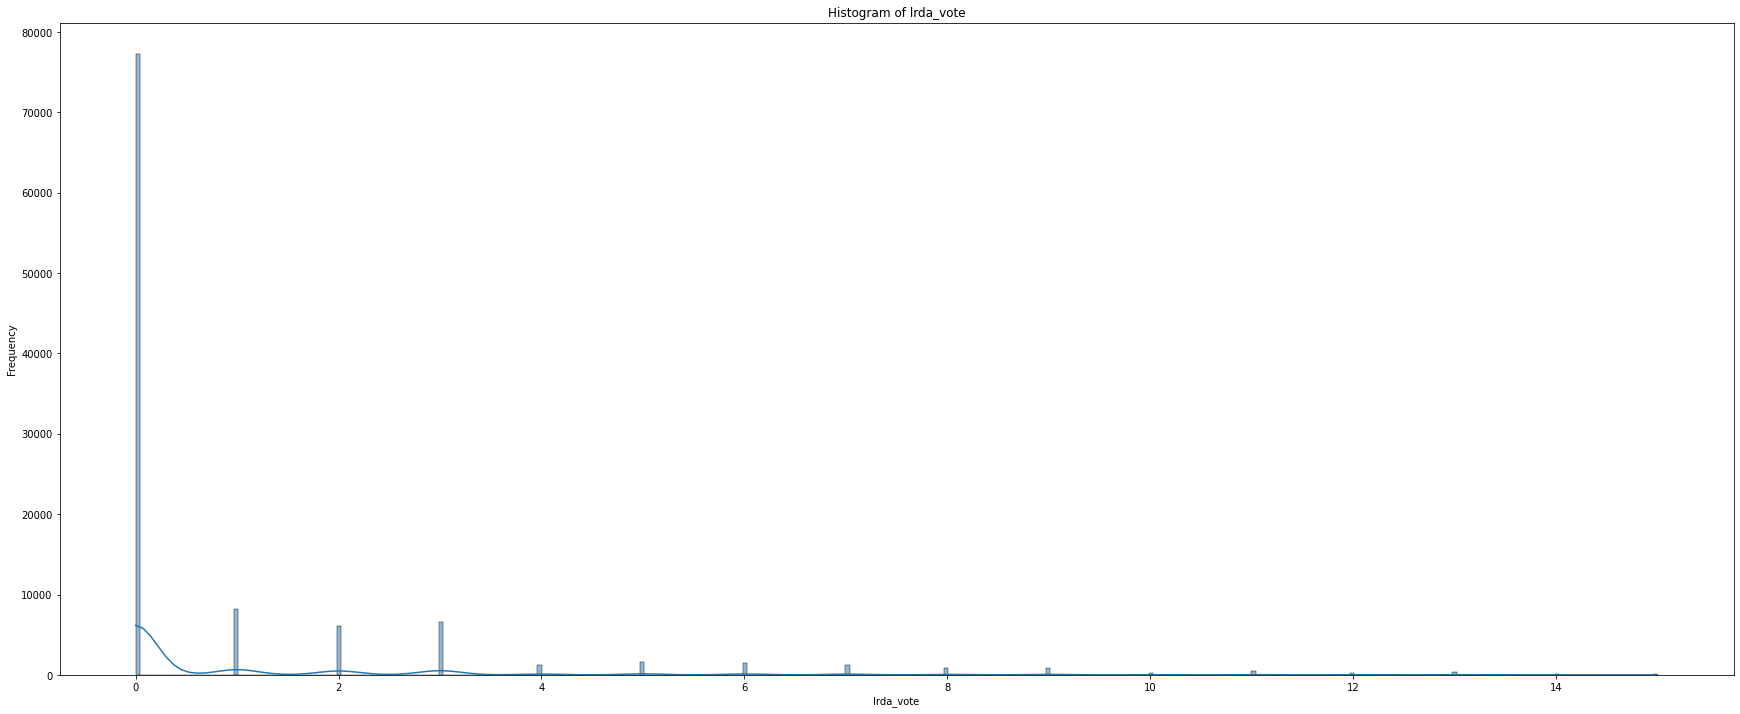

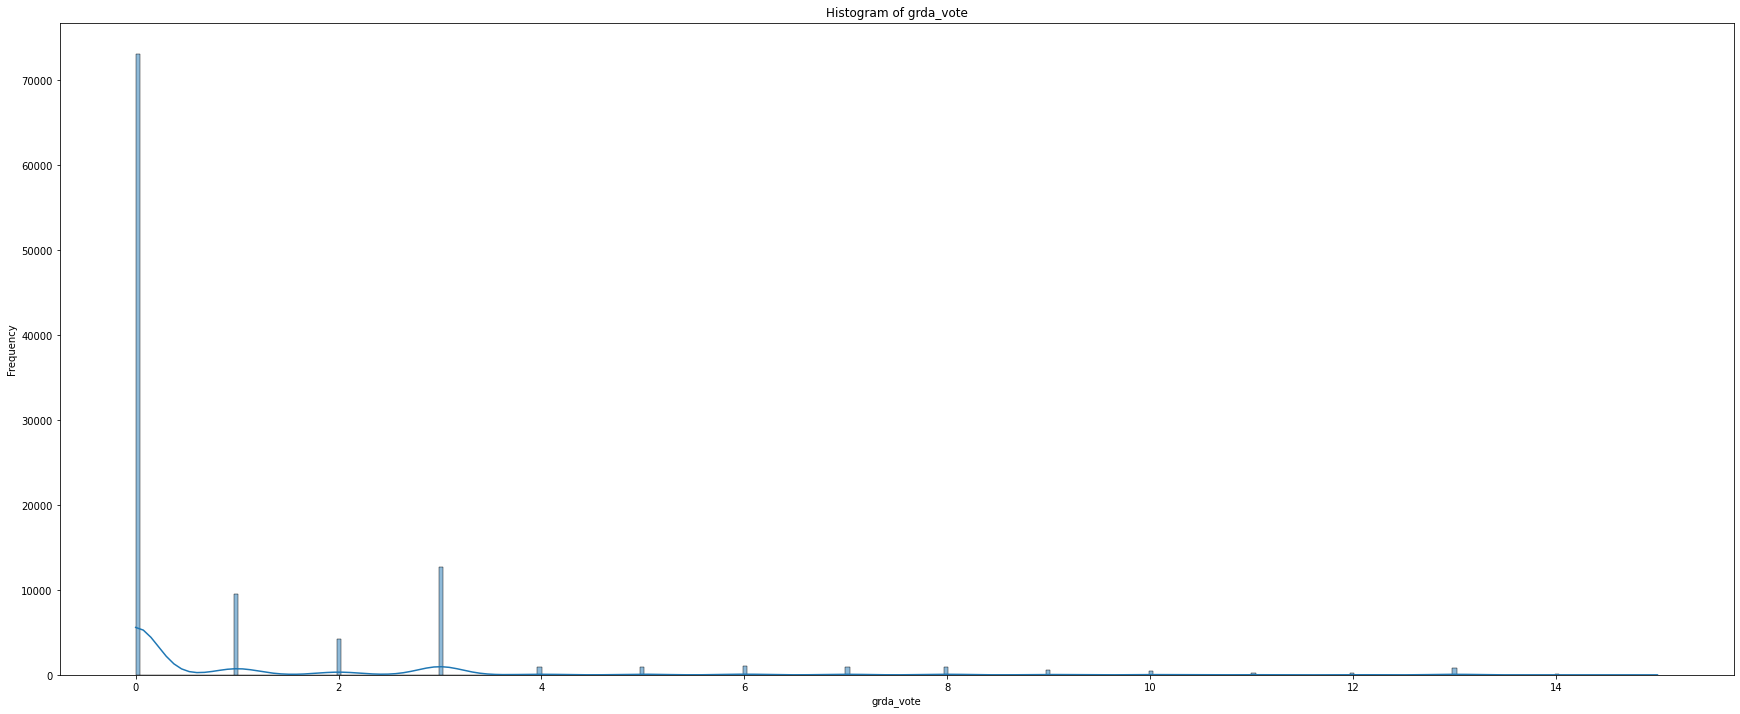

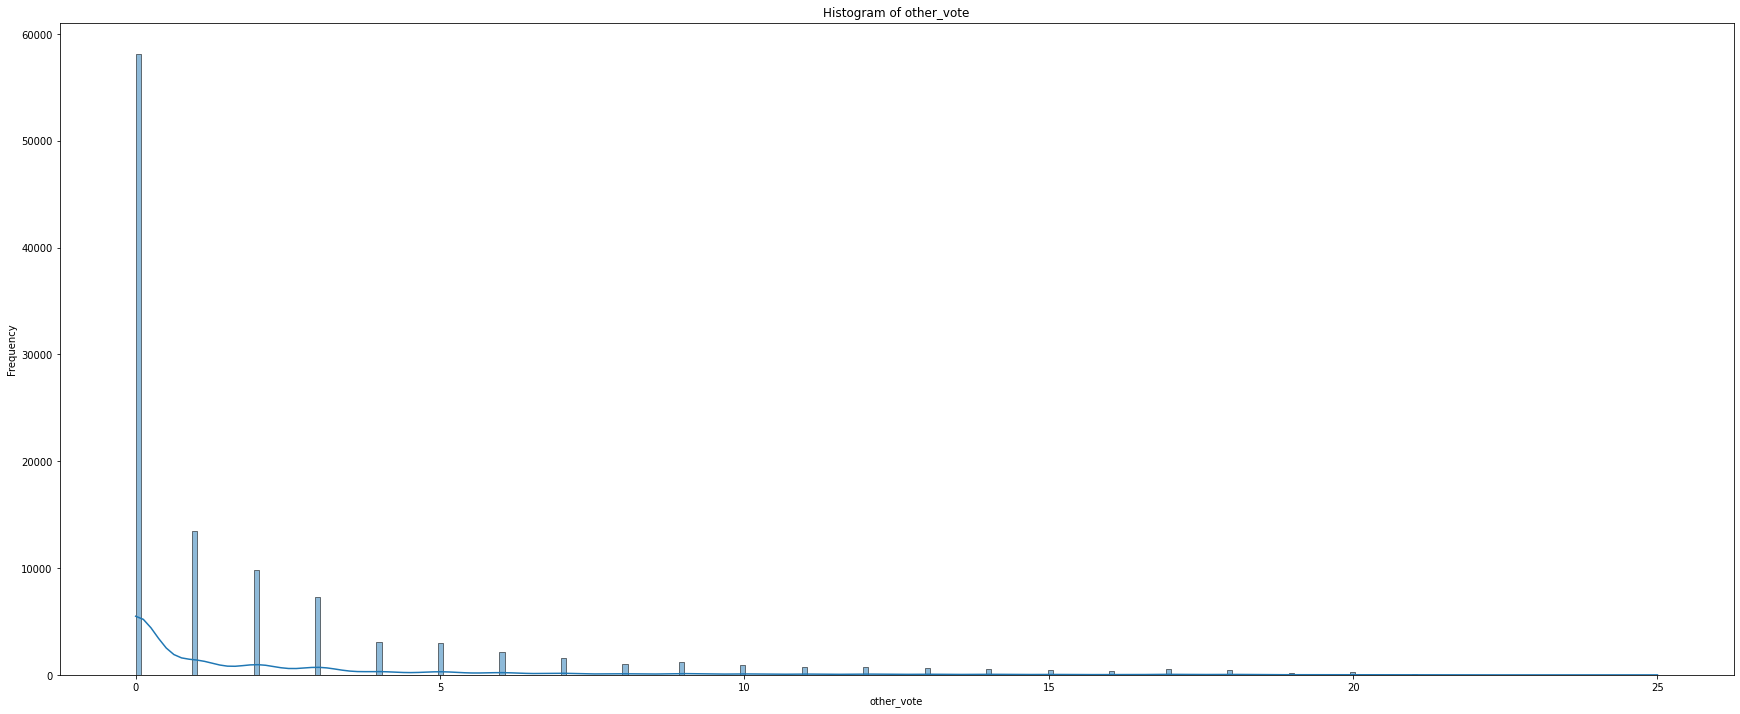

In [11]:
for column in dataset_wo_ids.select_dtypes(include='number'):
    plt.figure(figsize=(30, 12))  # Set the figure size
    sns.histplot(data=df, x=column, kde=True)  # Create the histogram with KDE (Kernel Density Estimation)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()